In [1]:
# Marketing Analytics Portfolio Project

# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For inline plots in Jupyter Notebook
%matplotlib inline

# Display plot styles
sns.set(style="whitegrid")


In [ ]:
# Define the file path to your Excel file
file_path = r"X:\GIT\Portfolio_Projects\Marketing Analytics\Data\ifood_df.csv"

# Read the Excel file into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df.head()


,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0


In [ ]:
# Check the dimensions of the data and its information
print("Dataset shape:", df.shape)
df.info()

# Descriptive statistics to understand numeric features
df.describe()

# Check for missing values in each column
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

# If necessary, handle missing values, e.g., fill with mean or drop rows/columns
# Example: fill missing numeric values with the column mean
df.fillna(df.mean(), inplace=True)

# Verify that missing values are addressed
print("Missing values after cleaning:\n", df.isnull().sum())


In [4]:
df.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Customer_Days', 'marital_Divorced', 'marital_Married',
       'marital_Single', 'marital_Together', 'marital_Widow',
       'education_2n Cycle', 'education_Basic', 'education_Graduation',
       'education_Master', 'education_PhD', 'MntTotal', 'MntRegularProds',
       'AcceptedCmpOverall'],
      dtype='object')

In [11]:
# Block 3: Data Cleaning and Preparation

# List of columns actually present in your dataset
required_columns = [
    'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
    'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
    'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
    'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4',
    'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact',
    'Z_Revenue', 'Response', 'Age', 'Customer_Days', 'marital_Divorced',
    'marital_Married', 'marital_Single', 'marital_Together', 'marital_Widow',
    'education_2n Cycle', 'education_Basic', 'education_Graduation',
    'education_Master', 'education_PhD', 'MntTotal', 'MntRegularProds',
    'AcceptedCmpOverall'
]

# If your dataset has extra columns, keep only these
df = df[required_columns]

# Check for missing values
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)

# Example: fill numeric missing values with column mean (adjust as needed)
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# Verify cleaning
print("\nAfter cleaning:")
df.info()
print(df.head())


Missing values per column:
 Income                  0
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
Customer_Days           0
marital_Divorced        0
marital_Married         0
marital_Single          0
marital_Together        0
marital_Widow           0
education_2n Cycle      0
education_Basic         0
education_Graduation    0
education_Master        0
education_PhD           0
MntTotal                0
MntRegular

C:\Users\HP\AppData\Local\Temp\ipykernel_22912\3828195700.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())


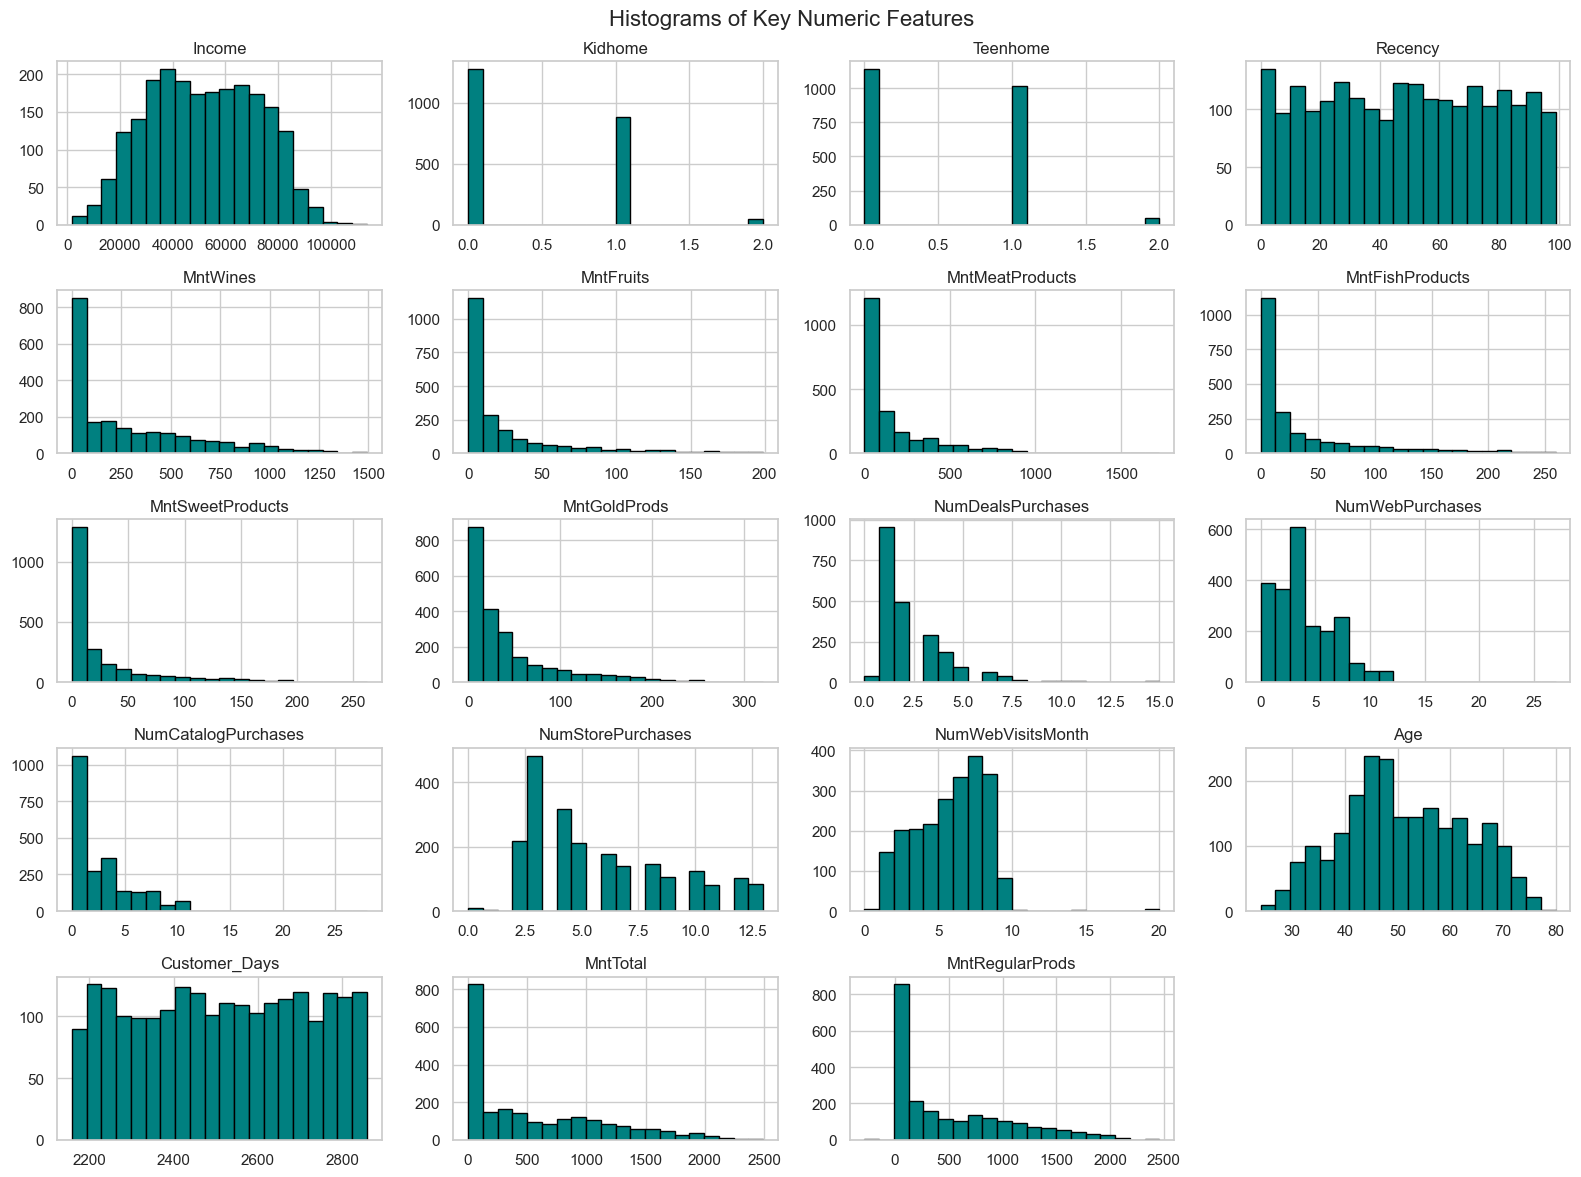

In [13]:
# Block 4.1: Univariate Analysis

# List numeric features for histograms
numeric_features = [
    'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
    'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
    'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
    'NumStorePurchases', 'NumWebVisitsMonth',
    'Age', 'Customer_Days', 'MntTotal', 'MntRegularProds'
]

df[numeric_features].hist(bins=20, figsize=(16, 12), color='teal', edgecolor='black')
plt.suptitle("Histograms of Key Numeric Features", fontsize=16)
plt.tight_layout()
plt.show()


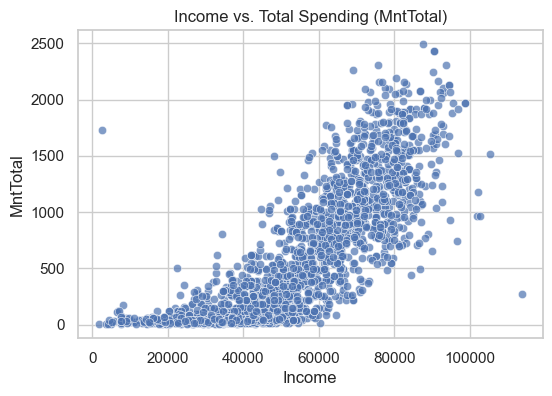

In [15]:
# Block 4.2: Bivariate Analysis

# Example: Relationship between Income and MntTotal
plt.figure(figsize=(6, 4))
sns.scatterplot(x='Income', y='MntTotal', data=df, alpha=0.7)
plt.title("Income vs. Total Spending (MntTotal)")
plt.xlabel("Income")
plt.ylabel("MntTotal")
plt.show()



Campaign Acceptance Counts:
AcceptedCmp1    142
AcceptedCmp2     30
AcceptedCmp3    163
AcceptedCmp4    164
AcceptedCmp5    161
dtype: int64


C:\Users\HP\AppData\Local\Temp\ipykernel_22912\1609449739.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=campaign_counts.index, y=campaign_counts.values, palette='viridis')


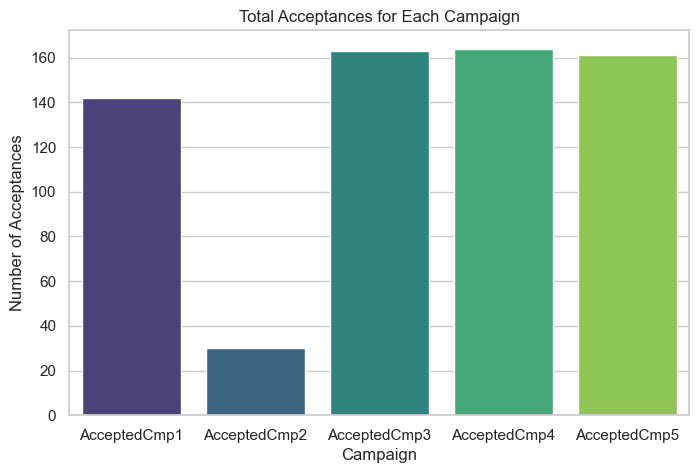

In [5]:
# Block 3: Exploratory Analysis of Campaign Responses

# Define the campaign response columns
campaign_columns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']

# Calculate total campaign acceptance counts (assuming binary 0/1 responses)
campaign_counts = df[campaign_columns].sum()
print("Campaign Acceptance Counts:")
print(campaign_counts)

# Visualize campaign acceptance counts
plt.figure(figsize=(8, 5))
sns.barplot(x=campaign_counts.index, y=campaign_counts.values, palette='viridis')
plt.title("Total Acceptances for Each Campaign")
plt.xlabel("Campaign")
plt.ylabel("Number of Acceptances")
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_22912\1899678566.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='TotalCampaignAccepted', data=df, palette='magma')


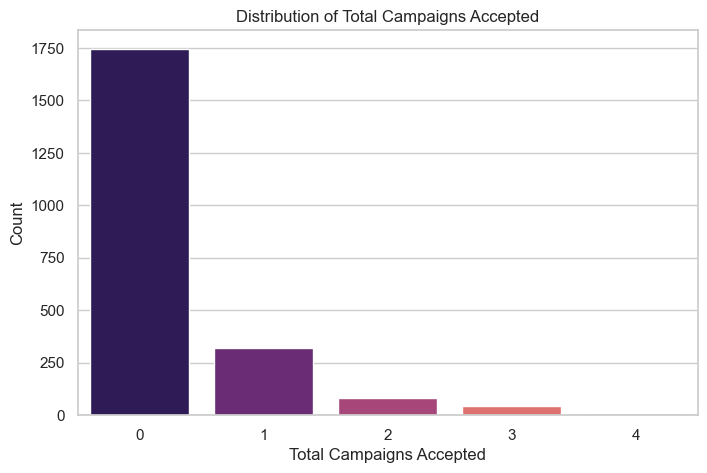

In [6]:
# Create a new column for total campaigns accepted by each customer
df['TotalCampaignAccepted'] = df[campaign_columns].sum(axis=1)

# Visualize the distribution of TotalCampaignAccepted
plt.figure(figsize=(8, 5))
sns.countplot(x='TotalCampaignAccepted', data=df, palette='magma')
plt.title("Distribution of Total Campaigns Accepted")
plt.xlabel("Total Campaigns Accepted")
plt.ylabel("Count")
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_22912\1264870018.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Campaign_Response', y='MntTotal', data=df, palette='Set2')


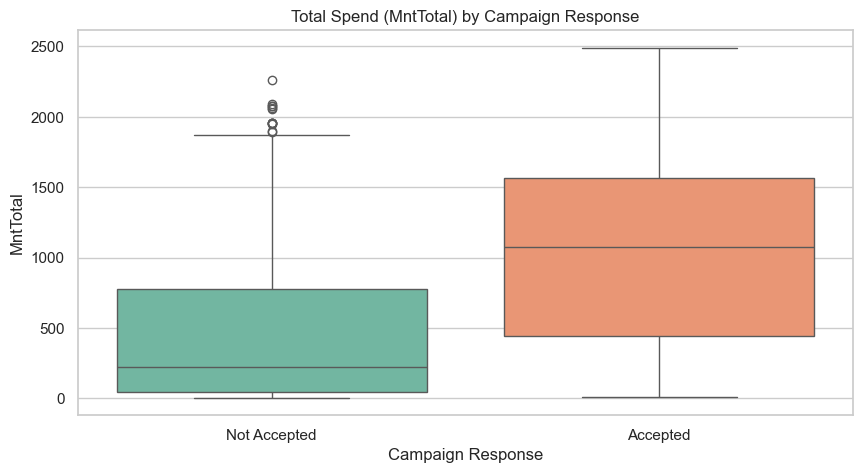

In [7]:
# Create a binary variable indicating if any campaign was accepted
df['Campaign_Response'] = np.where(df['TotalCampaignAccepted'] > 0, 'Accepted', 'Not Accepted')

# Box plot: Total Spend (MntTotal) by Campaign Response
plt.figure(figsize=(10, 5))
sns.boxplot(x='Campaign_Response', y='MntTotal', data=df, palette='Set2')
plt.title("Total Spend (MntTotal) by Campaign Response")
plt.xlabel("Campaign Response")
plt.ylabel("MntTotal")
plt.show()


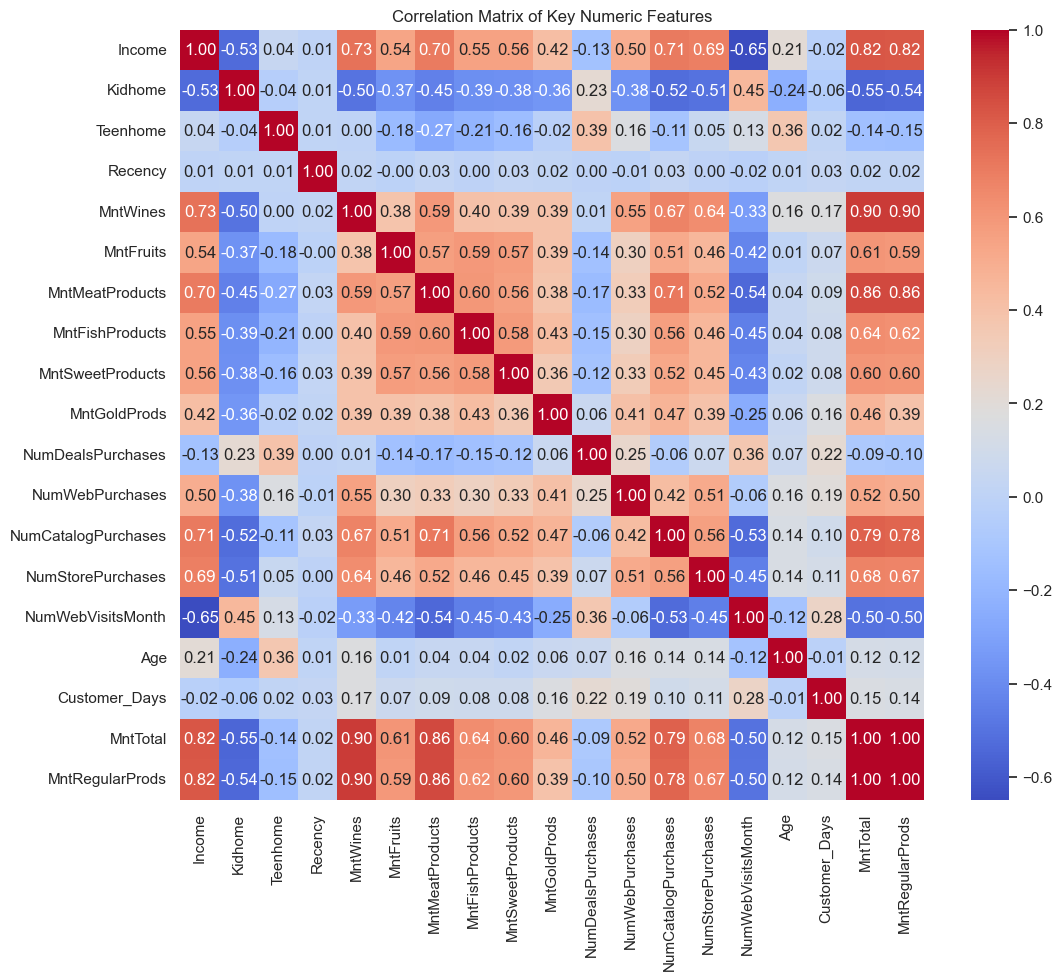

In [18]:
# Block 5.1: Correlation Analysis (Optional)

# Focus on numeric columns
corr_cols = [
    'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
    'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
    'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
    'NumStorePurchases', 'NumWebVisitsMonth', 
    'Age', 'Customer_Days', 'MntTotal', 'MntRegularProds'
]

corr_matrix = df[corr_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Key Numeric Features")
plt.show()


c:\Users\HP\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\HP\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\HP\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\HP\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1

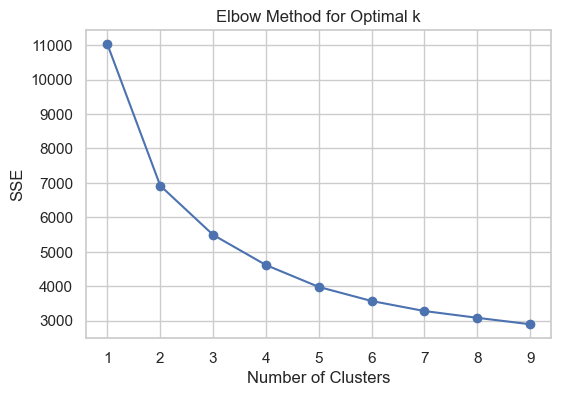

c:\Users\HP\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\HP\AppData\Local\Temp\ipykernel_22912\766155197.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cluster'] = np.nan


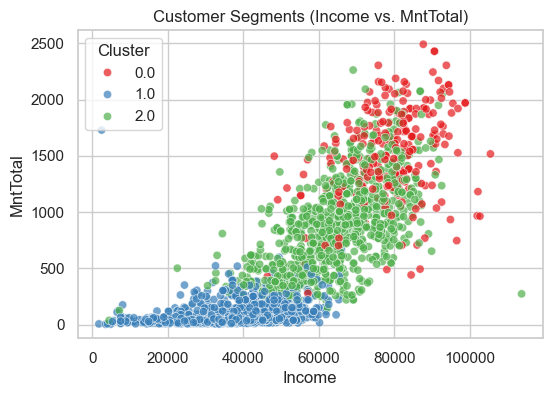

In [19]:
# Block 5.2: Customer Segmentation with K-Means

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Example subset of features for clustering
cluster_features = ['Income', 'MntTotal', 'NumWebPurchases', 'Recency', 'AcceptedCmpOverall']
df_cluster = df[cluster_features].dropna()

# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_cluster)

# Use the elbow method to decide on number of clusters
sse = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(6, 4))
plt.plot(range(1, 10), sse, marker='o')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

# Assume the elbow suggests 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_features)

# Add cluster labels to the original DataFrame
df['Cluster'] = np.nan
df.loc[df_cluster.index, 'Cluster'] = cluster_labels

# Visualize clusters in 2D (e.g., Income vs. MntTotal)
plt.figure(figsize=(6, 4))
sns.scatterplot(x='Income', y='MntTotal', data=df, hue='Cluster', palette='Set1', alpha=0.7)
plt.title("Customer Segments (Income vs. MntTotal)")
plt.xlabel("Income")
plt.ylabel("MntTotal")
plt.show()


In [21]:
# Block 5.3.2: Classification Example - Predicting Response

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# Choose a target (e.g., Response)
target_class = 'Response'
features_class = ['Income', 'MntTotal', 'Recency', 'Age', 'Kidhome', 'Teenhome']

df_class = df[features_class + [target_class]].dropna()

X_class = df_class[features_class]
y_class = df_class[target_class]

# Split data
Xc_train, Xc_test, yc_train, yc_test = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

# Build and train a logistic regression model
log_reg = LogisticRegression()
log_reg.fit(Xc_train, yc_train)

# Predictions
yc_pred = log_reg.predict(Xc_test)

# Evaluate
acc = accuracy_score(yc_test, yc_pred)
cm = confusion_matrix(yc_test, yc_pred)
cr = classification_report(yc_test, yc_pred)

print("Accuracy:", acc)
print("Confusion Matrix:\n", cm)
print("Classification Report:\n", cr)


Accuracy: 0.8639455782312925
Confusion Matrix:
 [[371   7]
 [ 53  10]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.98      0.93       378
           1       0.59      0.16      0.25        63

    accuracy                           0.86       441
   macro avg       0.73      0.57      0.59       441
weighted avg       0.83      0.86      0.83       441



# Block 6: Business Insights and Conclusions

1. **Key Findings from EDA:**
   - Histograms and scatter plots revealed distributions and relationships (e.g., *Income* vs. *MntTotal*).
   - Campaign acceptance patterns show which campaigns are most accepted.

2. **Segmentation:**
   - K-Means clustering highlighted groups with distinct profiles (e.g., high-income, high-spend vs. lower-income, moderate-spend).
   - This segmentation can guide targeted marketing strategies.

3. **Predictive Modeling:**
   - Classification results can identify customers likely to respond to campaigns.

4. **Next Steps:**
   - Refine or expand features (e.g., combine `MntWines` + `MntMeatProducts` into a `FoodAndBeverageSpend` feature).
   - Consider advanced model tuning (hyperparameter optimization) or alternative algorithms (Random Forest, XGBoost, etc.).
   - Explore the effect of *Age* and *Customer_Days* more deeply (e.g., are older or long-standing customers more/less responsive?).

